In [1]:
import os
from glob import glob
import dask
import xarray as xr
import xrft
import cartopy.crs as ccrs
from cmocean import cm
import numpy as np
from netCDF4 import Dataset
from scipy.io import loadmat

from matplotlib import pyplot as plt
%matplotlib inline

from mitequinox.utils import *

/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from dask_jobqueue import PBSCluster
local_dir = os.getenv('TMPDIR')
cluster = PBSCluster(local_directory=local_dir)

w = cluster.start_workers(15)

/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/distributed/utils.py:128: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 101] Network is unreachable
  % (host, default, e), RuntimeWarning)


In [3]:
# get dask handles and check dask server status
from dask.distributed import Client
client = Client(cluster)

In [4]:
client

Client Scheduler: tcp://10.148.1.21:45217 Dashboard: http://10.148.1.21:8787/status,Cluster Workers: 30 Cores: 120 Memory: 1500.00 GB


___________


In [5]:
out_dir_zarr = '/home1/scratch/xyu/OSMOSIS_llc4320/zarr_file/'
out_dir_mooring = '/home1/scratch/xyu/OSMOSIS_llc4320/mooring_site/'

lat_mooring = np.array([ 48.6875,  48.6940,  48.7480,  48.7000,  48.7485,  48.6803,  48.6290,  48.6780,  48.6290])
lon_mooring = np.array([-16.1875, -16.1740, -16.0945, -16.2060, -16.2762, -16.1740, -16.0990, -16.2050, -16.2775])

In [6]:
ds = xr.open_mfdataset('/home1/scratch/xyu/OSMOSIS_llc4320/mooring_site/T_mooring.nc')
ds

<xarray.Dataset>
Dimensions:  (depth: 52, lat: 9, lon: 9, time: 9415)
Coordinates:
  * depth    (depth) float64 0.5 1.57 2.79 4.185 5.78 7.595 9.66 12.01 14.68 ...
    dtime    (time) datetime64[ns] dask.array<shape=(9415,), chunksize=(9415,)>
  * lat      (lat) float32 48.68508 48.697998 48.749645 48.697998 48.749645 ...
  * lon      (lon) float32 -16.177084 -16.177084 -16.09375 -16.197916 ...
  * time     (time) float64 0.0 0.04167 0.08333 0.125 0.1667 0.2083 0.25 ...
Data variables:
    Theta    (time, depth, lat, lon) float32 dask.array<shape=(9415, 52, 9, 9), chunksize=(9415, 52, 9, 9)>

In [7]:
ds = ds.load()

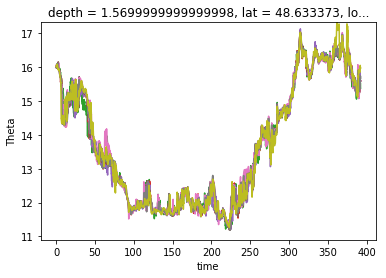

In [10]:
ds['Theta'].isel(depth=1,lat=0,lon=0).plot()
ds['Theta'].isel(depth=1,lat=1,lon=1).plot()
ds['Theta'].isel(depth=1,lat=2,lon=2).plot()
ds['Theta'].isel(depth=1,lat=3,lon=3).plot()
ds['Theta'].isel(depth=1,lat=4,lon=4).plot()
ds['Theta'].isel(depth=1,lat=5,lon=5).plot()
ds['Theta'].isel(depth=1,lat=6,lon=6).plot()
ds['Theta'].isel(depth=1,lat=7,lon=7).plot()
ds['Theta'].isel(depth=1,lat=8,lon=8).plot()

In [11]:
ds_U = xr.open_mfdataset('/home1/scratch/xyu/OSMOSIS_llc4320/mooring_site/U_mooring.nc')
ds_U

<xarray.Dataset>
Dimensions:  (depth: 52, lat: 9, lon: 9, time: 9415)
Coordinates:
  * depth    (depth) float64 0.5 1.57 2.79 4.185 5.78 7.595 9.66 12.01 14.68 ...
    dtime    (time) datetime64[ns] dask.array<shape=(9415,), chunksize=(9415,)>
  * lat      (lat) float32 48.68508 48.697998 48.749645 48.697998 48.749645 ...
  * lon      (lon) float32 -16.177084 -16.177084 -16.09375 -16.197916 ...
  * time     (time) float64 0.0 0.04167 0.08333 0.125 0.1667 0.2083 0.25 ...
Data variables:
    U        (time, depth, lat, lon) float32 dask.array<shape=(9415, 52, 9, 9), chunksize=(9415, 52, 9, 9)>

In [12]:
ds_U = ds_U.load()

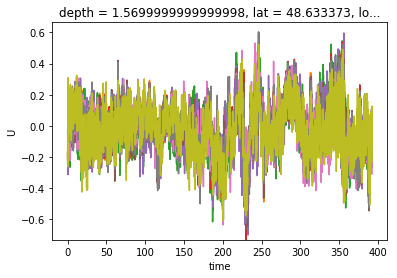

In [13]:
ds_U['U'].isel(depth=1,lat=0,lon=0).plot()
ds_U['U'].isel(depth=1,lat=1,lon=1).plot()
ds_U['U'].isel(depth=1,lat=2,lon=2).plot()
ds_U['U'].isel(depth=1,lat=3,lon=3).plot()
ds_U['U'].isel(depth=1,lat=4,lon=4).plot()
ds_U['U'].isel(depth=1,lat=5,lon=5).plot()
ds_U['U'].isel(depth=1,lat=6,lon=6).plot()
ds_U['U'].isel(depth=1,lat=7,lon=7).plot()
ds_U['U'].isel(depth=1,lat=8,lon=8).plot()

In [15]:
cluster.scheduler.close()

<Future finished result=None>